

# League Table

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Wharton Data Science Datasets/NSL_regular_season_data_2.csv')
group_matchups = pd.read_csv('/content/drive/MyDrive/Wharton Data Science Datasets/NSL_Group_Round_Games.csv')

print(data.head(), group_matchups.head())

         game_id HomeTeam AwayTeam  HomeScore  AwayScore  Home_xG  Away_xG  \
0   game_2023_94      TUC      ALB          1          3     2.52     2.00   
1  game_2023_341      MOB      ALB          3          1     0.46     0.99   
2  game_2023_442      CHM      ALB          0          1     1.62     1.16   
3   game_2023_50      SAS      ALB          2          1     1.53     0.55   
4  game_2023_389      FOR      ALB          0          2     2.15     1.13   

   Home_shots  Away_shots  Home_corner  Away_corner  Home_PK_Goal  \
0          13          15            3            4             0   
1          11           8            3            6             0   
2          16          13            1            7             0   
3          20           2            6            1             0   
4          18          13            2            0             0   

   Away_PK_Goal  Home_PK_shots  Away_PK_shots  Home_ToP  
0             0              1              0      0.53  


In [ ]:
data["OffenseBeatOdds"] = data["HomeScore"] - data["Home_xG"]
data["DefenseBeatOdds"] = data["Away_xG"] - data["AwayScore"]

season = data
season[['home_result']] = None

season.loc[season['HomeScore'] > season['AwayScore'], 'home_result'] = 'W'
season.loc[season['HomeScore'] == season['AwayScore'], 'home_result'] = 'D'
season.loc[season['HomeScore'] < season['AwayScore'], 'home_result'] = 'L'

season['home_result'].value_counts()

home_table = season[['game_id', 'HomeTeam', 'home_result']]

season[['away_result']] = None

season.loc[season['AwayScore'] > season['HomeScore'], 'away_result'] = 'W'
season.loc[season['AwayScore'] == season['HomeScore'], 'away_result'] = 'D'
season.loc[season['AwayScore'] < season['HomeScore'], 'away_result'] = 'L'

season['away_result'].value_counts()

away_table = season[['game_id', 'AwayTeam', 'away_result']]



metadata = pd.read_csv('/content/drive/MyDrive/Wharton Data Science Datasets/NSL_Metadata.csv')

teams = metadata[['name', 'Team_ID', 'conference']]
teams.rename(columns={'name':'team'}, inplace=True)

home_table = home_table.merge(teams, how='left', left_on='HomeTeam', right_on='Team_ID')
home_table.drop('HomeTeam', axis=1, inplace=True)
home_table.rename(columns={'home_result':'result'}, inplace=True)

away_table = away_table.merge(teams, how='left', left_on='AwayTeam', right_on='Team_ID')
away_table.drop('AwayTeam', axis=1, inplace=True)
away_table.rename(columns={'away_result':'result'}, inplace=True)


league_table = pd.concat([home_table, away_table])
league_table = league_table.groupby('Team_ID')['result'].value_counts().unstack().fillna(0)
league_table.rename(columns={'W':'Wins', 'D':'Draws', 'L':'Losses'}, inplace=True)


league_table['Points'] = 3 * league_table['Wins'] + league_table['Draws']
league_table.sort_values(by='Points', ascending=False, inplace=True)

league_table['Win %'] = round(league_table['Wins'] / 34, 3)




league_table


<ipython-input-4-4d54ca3d0808>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams.rename(columns={'name':'team'}, inplace=True)


result,Draws,Losses,Wins,Points,Win %
Team_ID,,,,,
ANC,7,7,20,67,0.588
AUG,8,7,19,65,0.559
FAR,3,11,20,63,0.588
JAC,10,7,17,61,0.500
LAR,6,10,18,60,0.529
PRO,5,12,17,56,0.500
SFS,10,9,15,55,0.441
OAK,8,11,15,53,0.441
LRO,8,11,15,53,0.441


In [ ]:
home_stats = data.groupby('HomeTeam').mean()
away_stats = data.groupby('AwayTeam').mean()
home_total_stats = data.groupby('HomeTeam').sum()
away_total_stats = data.groupby('AwayTeam').sum()

home_stats = home_stats.merge(home_total_stats, how='left', left_on='HomeTeam', right_on='HomeTeam', suffixes=('_avg', '_total'))
away_stats = away_stats.merge(away_total_stats, how='left', left_on='AwayTeam', right_on='AwayTeam', suffixes=('_avg', '_total'))
home_stats.columns = 'Home_' + home_stats.columns
away_stats.columns = 'Away_' + away_stats.columns

stats = home_stats.merge(away_stats, how='left', left_on='HomeTeam', right_on='AwayTeam').set_axis(home_stats.index)
stats

<ipython-input-5-982238c276b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_stats = data.groupby('HomeTeam').mean()
<ipython-input-5-982238c276b6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away_stats = data.groupby('AwayTeam').mean()
<ipython-input-5-982238c276b6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_total_stats = data.groupby('HomeTeam').sum()
<ipython-input-5-982238c276b6>:4: FutureWa

,Home_HomeScore_avg,Home_AwayScore_avg,Home_Home_xG_avg,Home_Away_xG_avg,Home_Home_shots_avg,Home_Away_shots_avg,Home_Home_corner_avg,Home_Away_corner_avg,Home_Home_PK_Goal_avg,Home_Away_PK_Goal_avg,...,Away_Away_shots_total,Away_Home_corner_total,Away_Away_corner_total,Away_Home_PK_Goal_total,Away_Away_PK_Goal_total,Away_Home_PK_shots_total,Away_Away_PK_shots_total,Away_Home_ToP_total,Away_OffenseBeatOdds_total,Away_DefenseBeatOdds_total
HomeTeam,,,,,,,,,,,,,,,,,,,,,
ALB,1.470588,1.823529,1.225882,1.215294,12.352941,12.058824,5.470588,2.941176,0.000000,0.000000,...,219,70,74,0,0,7,0,9.24,9.31,-8.18
ANC,1.411765,0.941176,2.084118,0.818824,17.882353,10.470588,5.352941,4.529412,0.000000,0.000000,...,204,94,66,2,0,4,1,8.74,1.11,-18.76
AUG,2.117647,1.411765,1.881176,0.923529,15.823529,9.705882,5.588235,4.058824,0.117647,0.000000,...,199,81,76,0,1,1,5,7.98,-3.39,-7.56
BAK,1.411765,1.352941,1.565882,0.996471,16.705882,12.411765,6.294118,4.529412,0.058824,0.000000,...,173,104,75,1,0,3,2,9.52,0.07,-7.34
BOI,1.235294,1.176471,1.854118,0.752941,16.705882,10.882353,6.352941,4.882353,0.058824,0.000000,...,204,121,59,0,0,4,3,9.33,5.25,-11.87
CHM,0.882353,1.117647,1.485882,1.167059,16.529412,10.764706,4.882353,4.294118,0.000000,0.000000,...,183,94,83,0,1,3,3,8.44,-5.15,-9.51
DES,1.647059,1.882353,1.225882,0.955882,12.352941,9.294118,5.235294,4.882353,0.058824,0.000000,...,193,98,70,0,1,4,3,8.30,-3.90,-10.04
DOV,1.941176,1.352941,1.835294,0.791176,17.058824,8.647059,5.058824,5.176471,0.000000,0.117647,...,229,96,70,1,1,4,2,9.78,14.30,-10.12
EUG,1.294118,1.588235,1.252353,1.202353,14.823529,11.294118,5.882353,4.470588,0.000000,0.000000,...,170,96,73,3,0,8,1,9.77,-2.16,-10.17


In [ ]:
import numpy as np

def get_home_away(team, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches = match_results[(match_results['HomeTeam'] == team)]
    away_team_matches = match_results[(match_results['AwayTeam'] == team)]

    return home_team_matches, away_team_matches

# Calculate Strength of Schedule
def calculate_strength_of_schedule(team, league_table, match_results):
    # Calculate opponents' Win %s
    opponents = match_results[(match_results['HomeTeam'] == team) | (match_results['AwayTeam'] == team)]
    not_team = lambda x: x if x != team else None
    home_opponents_teams = opponents['HomeTeam'].apply(not_team)
    away_opponents_teams = opponents['AwayTeam'].apply(not_team)
    opponents_teams = home_opponents_teams.combine(away_opponents_teams, (lambda x1, x2: x1 if x2 == None else x2))
    opponents_win_percentages = league_table.loc[opponents_teams, 'Win %']
    #print(opponents_win_percentages)
    # Calculate average opponents' Win %
    strength_of_schedule = opponents_win_percentages.mean()
    return float(round(strength_of_schedule, 3))

# Calculate Strength of Victory
def calculate_goal_differential(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_team_matches.loc[:, 'HomeGoalDifference'] = home_team_matches.loc[:,'HomeScore'] - home_team_matches.loc[:,'AwayScore']
    away_team_matches.loc[:, 'AwayGoalDifference'] = away_team_matches.loc[:,'AwayScore'] - away_team_matches.loc[:,'HomeScore']


    # Calculate total goal differential
    goal_differential = home_team_matches['HomeGoalDifference'].sum() + away_team_matches['AwayGoalDifference'].sum()
    return int(goal_differential)

def total_goals_scored(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_goals = home_team_matches.loc[:,'HomeScore'].sum()
    away_goals = away_team_matches.loc[:,'AwayScore'].sum()

    return int(home_goals + away_goals)

def total_goals_against(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_goals = home_team_matches.loc[:,'AwayScore'].sum()
    away_goals = away_team_matches.loc[:,'HomeScore'].sum()

    return int(home_goals + away_goals)

def avg_goals_scored(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_goals = home_team_matches.loc[:,'HomeScore'].mean()
    away_goals = away_team_matches.loc[:,'AwayScore'].mean()
    avg_goals = (home_goals + away_goals) / 2

    return float(round(avg_goals, 3))

def avg_goals_against(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_goals = home_team_matches.loc[:,'AwayScore'].mean()
    away_goals = away_team_matches.loc[:,'HomeScore'].mean()
    avg_goals = (home_goals + away_goals) / 2

    return float(round(avg_goals, 3))

def calculate_xGoal_differential(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches = match_results[(match_results['HomeTeam'] == team)]
    away_team_matches = match_results[(match_results['AwayTeam'] == team)]

    # Calculate the goal difference for each match
    home_team_matches.loc[:, 'HomeGoalDifference'] = home_team_matches.loc[:,'Home_xG'] - home_team_matches.loc[:,'Away_xG']
    away_team_matches.loc[:, 'AwayGoalDifference'] = away_team_matches.loc[:,'Away_xG'] - away_team_matches.loc[:,'Home_xG']

    # Calculate total xGoal differential
    xGoal_differential = home_team_matches['HomeGoalDifference'].sum() + away_team_matches['AwayGoalDifference'].sum()
    return float(round(xGoal_differential, 3))

def average_xGoal(team, league_table, match_results):
   # Get matches where the team is the home or away` team
    home_team_matches = match_results[(match_results['HomeTeam'] == team)]
    away_team_matches = match_results[(match_results['AwayTeam'] == team)]

    # Calculate total xGoal differential
    xGoal_differential = home_team_matches['Home_xG'].mean() + away_team_matches['Away_xG'].mean()
    return float(round(xGoal_differential, 3))

def average_xGoal_against(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches = match_results[(match_results['HomeTeam'] == team)]
    away_team_matches = match_results[(match_results['AwayTeam'] == team)]

    # Calculate total xGoal differential
    xGoal_differential = home_team_matches['Away_xG'].mean() + away_team_matches['Home_xG'].mean()
    return float(round(xGoal_differential, 3))

def goal_xG_ratio(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches = match_results[(match_results['HomeTeam'] == team)]
    away_team_matches = match_results[(match_results['AwayTeam'] == team)]

    home_team_matches.loc[:,'Average Home Ratio'] = home_team_matches.loc[:,'HomeScore'] / home_team_matches.loc[:,'Home_xG']
    away_team_matches.loc[:,'Average Home Ratio'] = away_team_matches.loc[:,'AwayScore'] / away_team_matches.loc[:,'Away_xG']

    average = (home_team_matches.loc[:,'Average Home Ratio'].mean() + away_team_matches.loc[:,'Average Home Ratio'].mean()) / 2
    return float(round(average, 3))

def total_shots(team, league_table, match_results):
    # Get matches where the team is the home or away` team
    home_team_matches, away_team_matches = get_home_away(team, match_results)

    # Calculate the goal difference for each match
    home_goals = home_team_matches.loc[:,'HomeScore'].mean()
    away_goals = away_team_matches.loc[:,'AwayScore'].mean()
    avg_goals = (home_goals + away_goals) / 2

    return float(round(avg_goals, 3))


# Calculate and add Strength of Schedule and Strength of Victory to league table
league_table['Total Goals Scored'] = None
league_table['Total Goals Against'] = None
league_table['Goal Differential'] = None
league_table['xG Differential'] = None
league_table['Average Goals Scored'] = None
league_table['Average Goals Against'] = None
league_table['Average xG'] = None
league_table['Average xG Against'] = None
league_table['Goal-xG Ratio'] = None
league_table['Strength Of Schedule'] = None

for row in league_table.index:
  league_table.loc[row, 'Total Goals Scored'] = total_goals_scored(row, league_table, season)
  league_table.loc[row, 'Total Goals Against'] = total_goals_against(row, league_table, season)
  league_table.loc[row, 'Average Goals Scored'] = avg_goals_scored(row, league_table, season)
  league_table.loc[row, 'Average Goals Against'] = avg_goals_against(row, league_table, season)
  league_table.loc[row, 'Goal Differential'] = calculate_goal_differential(row, league_table, season)
  league_table.loc[row, 'xG Differential'] = calculate_xGoal_differential(row, league_table, season)
  league_table.loc[row, 'Average xG'] = average_xGoal(row, league_table, season)
  league_table.loc[row, 'Average xG Against'] = average_xGoal_against(row, league_table, season)
  league_table.loc[row, 'Goal-xG Ratio'] = goal_xG_ratio(row, league_table, season)
  league_table.loc[row,'Strength Of Schedule'] = calculate_strength_of_schedule(row, league_table, season)


league_table.sort_values(by='Points', ascending=False, inplace=True)

league_table2 = league_table.merge(stats, how='left', left_on='Team_ID', right_on='HomeTeam').set_axis(league_table.index)

#league_table2.reset_index()
league_table2.columns.values

<ipython-input-6-3e07b35eb680>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_team_matches.loc[:, 'HomeGoalDifference'] = home_team_matches.loc[:,'HomeScore'] - home_team_matches.loc[:,'AwayScore']
<ipython-input-6-3e07b35eb680>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_team_matches.loc[:, 'AwayGoalDifference'] = away_team_matches.loc[:,'AwayScore'] - away_team_matches.loc[:,'HomeScore']
<ipython-input-6-3e07b35eb680>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of

array(['Draws', 'Losses', 'Wins', 'Points', 'Win %', 'Total Goals Scored',
       'Total Goals Against', 'Goal Differential', 'xG Differential',
       'Average Goals Scored', 'Average Goals Against', 'Average xG',
       'Average xG Against', 'Goal-xG Ratio', 'Strength Of Schedule',
       'Home_HomeScore_avg', 'Home_AwayScore_avg', 'Home_Home_xG_avg',
       'Home_Away_xG_avg', 'Home_Home_shots_avg', 'Home_Away_shots_avg',
       'Home_Home_corner_avg', 'Home_Away_corner_avg',
       'Home_Home_PK_Goal_avg', 'Home_Away_PK_Goal_avg',
       'Home_Home_PK_shots_avg', 'Home_Away_PK_shots_avg',
       'Home_Home_ToP_avg', 'Home_OffenseBeatOdds_avg',
       'Home_DefenseBeatOdds_avg', 'Home_HomeScore_total',
       'Home_AwayScore_total', 'Home_Home_xG_total', 'Home_Away_xG_total',
       'Home_Home_shots_total', 'Home_Away_shots_total',
       'Home_Home_corner_total', 'Home_Away_corner_total',
       'Home_Home_PK_Goal_total', 'Home_Away_PK_Goal_total',
       'Home_Home_PK_shots_total'

<ipython-input-38-5e19168b5de4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = league_table2.corr()


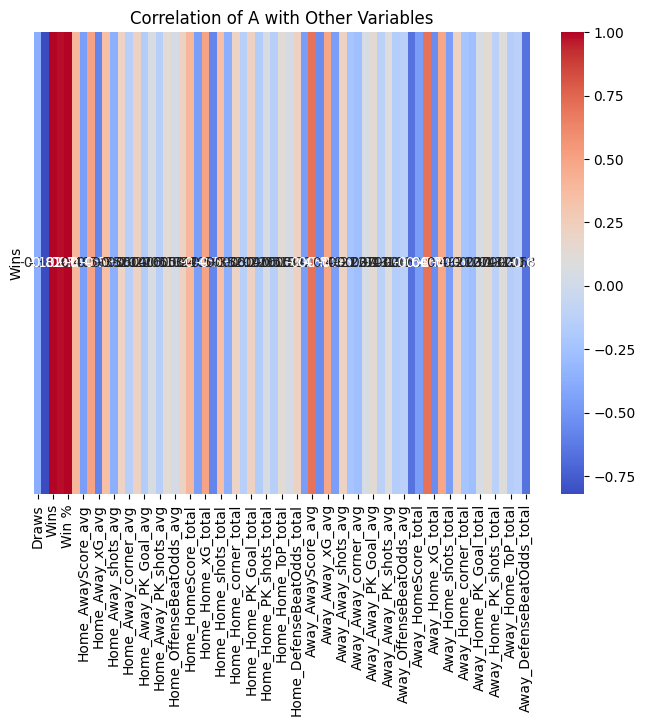

Home_Home_xG_avg            0.498444
Home_Away_xG_avg            0.575039
Away_Home_xG_avg            0.540365
Away_Away_xG_avg            0.481195
Away_DefenseBeatOdds_avg    0.659824
Home_Home_shots_avg         0.351868
Away_Away_shots_avg         0.211933
Name: Wins, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = league_table2.corr()
# Select only the correlations with variable 'A'
corr_with_a = corr_matrix['Wins']

# Plot the correlation of 'A' with other variables as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_a.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of A with Other Variables')
plt.show()

correlation_with_A = corr_matrix['Wins'].abs().sort_values(ascending=False)

# Filter out 'A' since it will always have a perfect correlation with itself
correlation_with_A = correlation_with_A[["Home_Home_xG_avg", "Home_Away_xG_avg", "Away_Home_xG_avg", "Away_Away_xG_avg", "Away_DefenseBeatOdds_avg", "Home_Home_shots_avg", "Away_Away_shots_avg"]]

# Display the sorted correlation
print(correlation_with_A)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


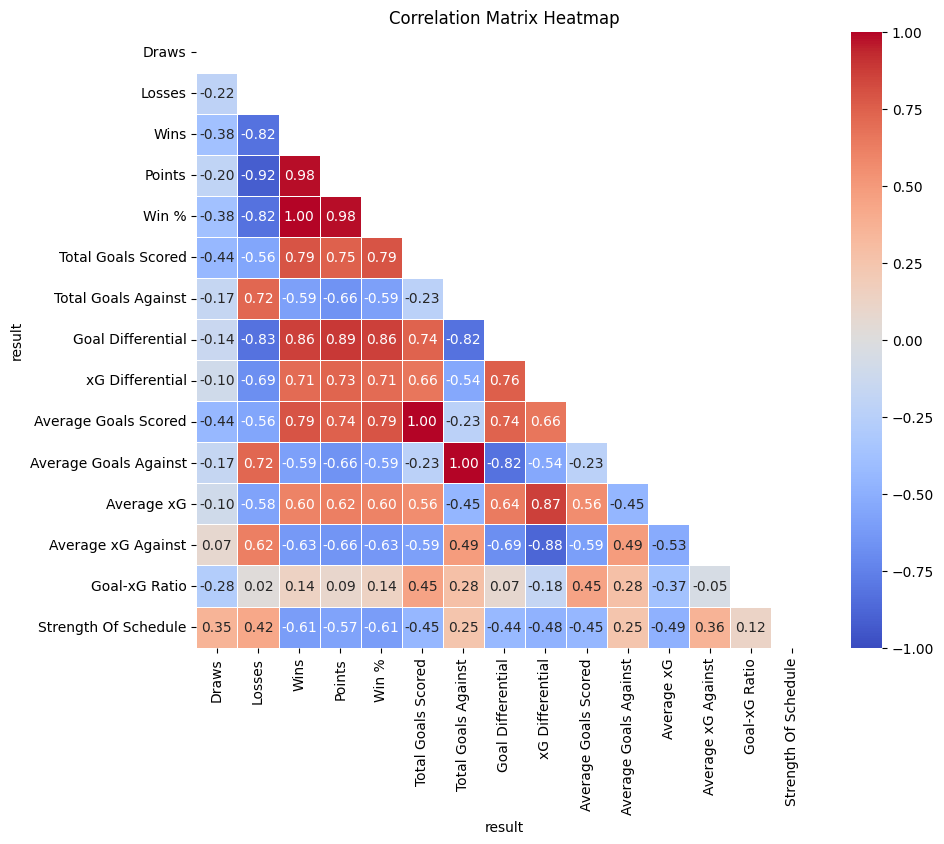

In [ ]:
# Compute the correlation matrix
corr = league_table.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

# XGBoost

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Wharton Data Science Datasets/NSL_regular_season_data_2.csv')
df["OffenseBeatOdds"] = df["HomeScore"] - df["Home_xG"]
df["DefenseBeatOdds"] = df["Away_xG"] - df["AwayScore"]
df["Outcome"] = (df["HomeScore"] > df["AwayScore"]).astype(int)
df["Outcome"] += (df["HomeScore"] == df["AwayScore"]).astype(int) / 2
df.head()

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,OffenseBeatOdds,DefenseBeatOdds,Outcome
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,-1.52,-1.00,0.0
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,2.54,-0.01,1.0
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,-1.62,0.16,0.0
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,0.47,-0.45,1.0
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,-2.15,-0.87,0.0


In [ ]:
home_stats = df.groupby('HomeTeam').mean()
away_stats = df.groupby('AwayTeam').mean()

home_stats.head()

<ipython-input-11-564f78a9518f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_stats = df.groupby('HomeTeam').mean()
<ipython-input-11-564f78a9518f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away_stats = df.groupby('AwayTeam').mean()


,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,OffenseBeatOdds,DefenseBeatOdds,Outcome
HomeTeam,,,,,,,,,,,,,,,,
ALB,1.470588,1.823529,1.225882,1.215294,12.352941,12.058824,5.470588,2.941176,0.000000,0.0,0.235294,0.176471,0.497647,0.244706,-0.608235,0.382353
ANC,1.411765,0.941176,2.084118,0.818824,17.882353,10.470588,5.352941,4.529412,0.000000,0.0,0.235294,0.117647,0.480000,-0.672353,-0.122353,0.764706
AUG,2.117647,1.411765,1.881176,0.923529,15.823529,9.705882,5.588235,4.058824,0.117647,0.0,0.294118,0.235294,0.577647,0.236471,-0.488235,0.735294
BAK,1.411765,1.352941,1.565882,0.996471,16.705882,12.411765,6.294118,4.529412,0.058824,0.0,0.176471,0.058824,0.476471,-0.154118,-0.356471,0.500000
BOI,1.235294,1.176471,1.854118,0.752941,16.705882,10.882353,6.352941,4.882353,0.058824,0.0,0.294118,0.000000,0.505294,-0.618824,-0.423529,0.500000


In [ ]:
away_stats['possession'] = 1 - away_stats['Home_ToP']
df.drop('Home_ToP', axis=1)
away_stats.head()

,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,OffenseBeatOdds,DefenseBeatOdds,Outcome,possession
AwayTeam,,,,,,,,,,,,,,,,,
ALB,2.117647,1.764706,1.570000,1.283529,15.705882,12.882353,4.117647,4.352941,0.000000,0.000000,0.411765,0.000000,0.543529,0.547647,-0.481176,0.558824,0.456471
ANC,1.588235,2.117647,1.522941,1.014118,12.764706,12.000000,5.529412,3.882353,0.117647,0.000000,0.235294,0.058824,0.514118,0.065294,-1.103529,0.382353,0.485882
AUG,1.352941,1.529412,1.552353,1.084706,12.117647,11.705882,4.764706,4.470588,0.000000,0.058824,0.058824,0.294118,0.469412,-0.199412,-0.444706,0.382353,0.530588
BAK,1.647059,1.352941,1.642941,0.921176,16.235294,10.176471,6.117647,4.411765,0.058824,0.000000,0.176471,0.117647,0.560000,0.004118,-0.431765,0.588235,0.440000
BOI,1.882353,1.823529,1.573529,1.125294,15.352941,12.000000,7.117647,3.470588,0.000000,0.000000,0.235294,0.176471,0.548824,0.308824,-0.698235,0.529412,0.451176


In [ ]:
home_stats['Home_goal-xG'] = home_stats['HomeScore'] / home_stats['Home_xG']
away_stats['Away_goal_xG'] = away_stats['AwayScore'] / home_stats['Away_xG']

home_stats.head()

,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,OffenseBeatOdds,DefenseBeatOdds,Outcome,Home_goal-xG
HomeTeam,,,,,,,,,,,,,,,,,
ALB,1.470588,1.823529,1.225882,1.215294,12.352941,12.058824,5.470588,2.941176,0.000000,0.0,0.235294,0.176471,0.497647,0.244706,-0.608235,0.382353,1.199616
ANC,1.411765,0.941176,2.084118,0.818824,17.882353,10.470588,5.352941,4.529412,0.000000,0.0,0.235294,0.117647,0.480000,-0.672353,-0.122353,0.764706,0.677392
AUG,2.117647,1.411765,1.881176,0.923529,15.823529,9.705882,5.588235,4.058824,0.117647,0.0,0.294118,0.235294,0.577647,0.236471,-0.488235,0.735294,1.125704
BAK,1.411765,1.352941,1.565882,0.996471,16.705882,12.411765,6.294118,4.529412,0.058824,0.0,0.176471,0.058824,0.476471,-0.154118,-0.356471,0.500000,0.901578
BOI,1.235294,1.176471,1.854118,0.752941,16.705882,10.882353,6.352941,4.882353,0.058824,0.0,0.294118,0.000000,0.505294,-0.618824,-0.423529,0.500000,0.666244


In [ ]:
# Create a new dataframe
new_df = pd.DataFrame()

home_stats.columns = 'Home_' + home_stats.columns
away_stats.columns = 'Away_' + away_stats.columns

# Loop through the df dataframe
for index, row in df.iterrows():
    # Get the home and away teams
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']

    # Get the home and away team statistics
    home_stats_things = home_stats.loc[[home_team]]
    away_stats_things = away_stats.loc[[away_team]]

    # Create a new row for the new dataframe
    new_row = pd.concat([row, home_stats_things.squeeze(), away_stats_things.squeeze()])

    # Add the new row to the new dataframe
    new_df = new_df.append(new_row, ignore_index=True)

# Display the new dataframe
new_df.head()


<ipython-input-14-04aa542d6181>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-04aa542d6181>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-04aa542d6181>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-04aa542d6181>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-04aa542d6181>:21: FutureWarning: The frame.append method is deprecated and will be removed fro

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,...,Away_Home_PK_Goal,Away_Away_PK_Goal,Away_Home_PK_shots,Away_Away_PK_shots,Away_Home_ToP,Away_OffenseBeatOdds,Away_DefenseBeatOdds,Away_Outcome,Away_possession,Away_Away_goal_xG
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,...,0.0,0.0,0.411765,0.0,0.543529,0.547647,-0.481176,0.558824,0.456471,1.452081
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,...,0.0,0.0,0.411765,0.0,0.543529,0.547647,-0.481176,0.558824,0.456471,1.452081
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,...,0.0,0.0,0.411765,0.0,0.543529,0.547647,-0.481176,0.558824,0.456471,1.452081
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,...,0.0,0.0,0.411765,0.0,0.543529,0.547647,-0.481176,0.558824,0.456471,1.452081
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,...,0.0,0.0,0.411765,0.0,0.543529,0.547647,-0.481176,0.558824,0.456471,1.452081


In [ ]:
def get_row(home_team, away_team):
    # Get the home and away team statistics
    home_stats_things = home_stats.loc[[home_team]]
    away_stats_things = away_stats.loc[[away_team]]

    # Create a new row for the new dataframe
    new_row = pd.concat([home_stats_things.squeeze(), away_stats_things.squeeze()])
    return new_row

In [ ]:
features = ["Outcome", "Home_Home_xG", "Home_Away_xG", "Away_Home_xG", "Away_Away_xG",  "Away_DefenseBeatOdds", "Home_DefenseBeatOdds", "Away_OffenseBeatOdds", "Home_OffenseBeatOdds", "Home_Home_shots", "Away_Away_shots", "Home_Home_goal-xG", "Away_Away_goal_xG"]
training_data = new_df[features]
training_data.tail()

,Outcome,Home_Home_xG,Home_Away_xG,Away_Home_xG,Away_Away_xG,Away_DefenseBeatOdds,Home_DefenseBeatOdds,Away_OffenseBeatOdds,Home_OffenseBeatOdds,Home_Home_shots,Away_Away_shots,Home_Home_goal-xG,Away_Away_goal_xG
471,1.0,1.681765,1.120000,2.106471,0.968235,-0.325882,-1.056471,-0.165294,0.024118,13.823529,11.117647,1.014341,0.991885
472,0.0,1.835294,0.791176,2.106471,0.968235,-0.325882,-0.561765,-0.165294,0.105882,17.058824,11.117647,1.057692,0.991885
473,0.5,1.826471,1.011765,2.106471,0.968235,-0.325882,-0.576471,-0.165294,-0.179412,14.823529,11.117647,0.901771,0.991885
474,0.0,1.225882,1.215294,2.106471,0.968235,-0.325882,-0.608235,-0.165294,0.244706,12.352941,11.117647,1.199616,0.991885
475,1.0,2.084118,0.818824,2.106471,0.968235,-0.325882,-0.122353,-0.165294,-0.672353,17.882353,11.117647,0.677392,0.991885


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

new_df = training_data[training_data['Outcome'] != 0.5]

# Split the data into features (X) and target variable (y)
X = new_df.drop('Outcome', axis=1)
y = (new_df['Outcome']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Get probabilities for each class
y_probabilities = xgb_model.predict_proba(X_test)
y_pred = xgb_model.predict(X_test)


# Access probabilities for each class
probability_of_class_0 = y_probabilities[:, 0]  # probability of class 0 (losing)
probability_of_class_1 = y_probabilities[:, 1]  # probability of class 1 (winning)

# Print or use the probabilities as needed
print("Probabilities for losing:", probability_of_class_0)
print("Probabilities for winning:", probability_of_class_1)

# Make predictions on the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Probabilities for losing: [0.00416529 0.99340105 0.95217127 0.98503757 0.98956394 0.18569553
 0.94267493 0.59948444 0.01479256 0.99178374 0.06620014 0.8876989
 0.7061318  0.05200768 0.06203359 0.23283458 0.85604876 0.1408853
 0.21455914 0.90090036 0.10475725 0.9830927  0.81838584 0.23282498
 0.877829   0.04951912 0.8373692  0.17646915 0.02389944 0.11725533
 0.43892556 0.6616277  0.79668725 0.22838199 0.54257464 0.91048336
 0.47659904 0.27121282 0.96209764 0.38057798 0.15170538 0.05926621
 0.99046    0.94982797 0.878091   0.04797959 0.07147425 0.21229643
 0.411568   0.0535894  0.04280066 0.18212426 0.0364877  0.82946396
 0.30191004 0.9766447  0.85202324 0.89979553 0.09784919 0.9994819
 0.13871795 0.20523739 0.7081547  0.2137428  0.05755961 0.06767863
 0.4358645  0.80634004 0.15328807 0.02433771 0.94580305 0.06324315
 0.92594796]
Probabilities for winning: [9.95834708e-01 6.59896480e-03 4.78287190e-02 1.49624050e-02
 1.04360851e-02 8.14304471e-01 5.73250800e-02 4.00515586e-01
 9.85207438

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Assuming 'league_table' is your DataFrame containing the overall season stats for each team
# Assuming 'season' is your DataFrame containing matchups between two teams

# Features and target variable
X = new_df.drop('Outcome', axis=1)  # Drop the target variable 'Outcome'
y = new_df['Outcome']

# ANOVA F-test for continuous features (e.g., Total Goals Scored)
f_scores = []
for feature in X:
  f_selector = SelectKBest(f_classif, k='all')
  f_selector.fit_transform(X[[feature]], y)
  f_scores.append(f_selector.scores_)

print(f_scores)
# Combine feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F Score': f_scores
})

# Sort features by score
feature_scores = feature_scores.sort_values(by=['F Score'], ascending=False)

# Print the most important features
print(feature_scores)

[array([9.76508992]), array([10.71390095]), array([17.67473836]), array([13.67749132]), array([14.10704657]), array([3.43773317]), array([3.09214549]), array([0.00306912]), array([7.94536134]), array([2.99929489]), array([0.09221835]), array([15.33536346])]
                 Feature                F Score
2           Away_Home_xG   [17.674738362075306]
11     Away_Away_goal_xG    [15.33536346114211]
4   Away_DefenseBeatOdds   [14.107046567306014]
3           Away_Away_xG   [13.677491320927224]
1           Home_Away_xG   [10.713900947779306]
0           Home_Home_xG      [9.7650899240115]
8        Home_Home_shots    [7.945361338818445]
5   Home_DefenseBeatOdds    [3.437733165575278]
6   Away_OffenseBeatOdds   [3.0921454901370296]
9        Away_Away_shots    [2.999294886419628]
10     Home_Home_goal-xG  [0.09221834903448484]
7   Home_OffenseBeatOdds  [0.00306912120446304]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

new_df = training_data[training_data['Outcome'] != 0.5]

# Split the data into features (X) and target variable (y)
X = new_df.drop('Outcome', axis=1)
y = (new_df['Outcome']).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the linear Support Vector Classifier (Linear SVC) model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Predict the probabilities of the test set
proba = model.predict_proba(X_test)

# Print the predicted probabilities
print(proba)

Accuracy: 0.6027397260273972

Confusion Matrix:
[[19 19]
 [10 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        38
           1       0.57      0.71      0.63        35

    accuracy                           0.60        73
   macro avg       0.61      0.61      0.60        73
weighted avg       0.61      0.60      0.60        73

[[0.52695748 0.47304252]
 [0.46681865 0.53318135]
 [0.51546842 0.48453158]
 [0.1724393  0.8275607 ]
 [0.66535247 0.33464753]
 [0.42378561 0.57621439]
 [0.65215123 0.34784877]
 [0.75734181 0.24265819]
 [0.31992417 0.68007583]
 [0.20284695 0.79715305]
 [0.53925719 0.46074281]
 [0.58584258 0.41415742]
 [0.40596359 0.59403641]
 [0.457538   0.542462  ]
 [0.50090958 0.49909042]
 [0.25658687 0.74341313]
 [0.48649796 0.51350204]
 [0.63606106 0.36393894]
 [0.46143316 0.53856684]
 [0.79740745 0.20259255]
 [0.34321262 0.65678738]
 [0.4107063  0.5892937 ]
 [0.56603185 0.43396815]
 [0.404

In [ ]:
def get_logistic_prediction(home='TUC', away='MOB'):
    thingy = get_row(home, away)

    thing_features = []
    for feature in features:
        if feature != "Outcome":
            thing_features.append(feature)

    X = thingy[thing_features]
    # Get probabilities for each class
    y_probabilities = model.predict_proba([X])

    # Access probabilities for each class
    probability_of_class_0 = y_probabilities[:, 0][0]  # probability of class 0 (losing)
    probability_of_class_1 = y_probabilities[:, 1][0]  # probability of class 1 (winning)

    # Print or use the probabilities as needed
    print("Probabilities for away team losing:", probability_of_class_0)
    print("Probabilities for home team winning:", probability_of_class_1)
    return probability_of_class_0, probability_of_class_1

def get_xgb_prediction(home='TUC', away='MOB'):
    thingy = get_row(home, away)

    thing_features = []
    for feature in features:
        if feature != "Outcome":
            thing_features.append(feature)

    X = thingy[thing_features]
    # Get probabilities for each class
    y_probabilities = xgb_model.predict_proba([X])

    # Access probabilities for each class
    probability_of_class_0 = y_probabilities[:, 0][0]  # probability of class 0 (losing)
    probability_of_class_1 = y_probabilities[:, 1][0]  # probability of class 1 (winning)

    # Print or use the probabilities as needed
    print("Probabilities for away team losing:", probability_of_class_0)
    print("Probabilities for home team winning:", probability_of_class_1)
    return probability_of_class_0, probability_of_class_1

In [ ]:
group_stage = pd.read_csv("/content/drive/MyDrive/Wharton Data Science Datasets/NSL_Group_Round_Games.csv")
group_stage['logistic prediction'] = group_stage.apply(lambda row: get_logistic_prediction(row['HomeTeam'], row['AwayTeam'])[1], axis=1)
group_stage['xgboost prediction'] = group_stage.apply(lambda row: get_xgb_prediction(row['HomeTeam'], row['AwayTeam'])[1], axis=1)
group_stage

Probabilities for away team losing: 0.21485289669490182
Probabilities for home team winning: 0.7851471033050982
Probabilities for away team losing: 0.17911140444091134
Probabilities for home team winning: 0.8208885955590887
Probabilities for away team losing: 0.7638170213844802
Probabilities for home team winning: 0.23618297861551982
Probabilities for away team losing: 0.257092014918055
Probabilities for home team winning: 0.742907985081945
Probabilities for away team losing: 0.2424769947213391
Probabilities for home team winning: 0.7575230052786609
Probabilities for away team losing: 0.21525146976707366
Probabilities for home team winning: 0.7847485302329263
Probabilities for away team losing: 0.308565743403866
Probabilities for home team winning: 0.691434256596134
Probabilities for away team losing: 0.2440818167008031
Probabilities for home team winning: 0.7559181832991969
Probabilities for away team losing: 0.802699737870487
Probabilities for home team winning: 0.19730026212951302
P

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

0.6045115725757595
Probabilities for home team winning: 0.39548842742424056
Probabilities for away team losing: 0.4053341230676909
Probabilities for home team winning: 0.5946658769323091
Probabilities for away team losing: 0.4979244589629124
Probabilities for home team winning: 0.5020755410370876
Probabilities for away team losing: 0.29432077952063707
Probabilities for home team winning: 0.7056792204793629
Probabilities for away team losing: 0.30157276089886476
Probabilities for home team winning: 0.6984272391011352
Probabilities for away team losing: 0.14611053820617048
Probabilities for home team winning: 0.8538894617938295
Probabilities for away team losing: 0.6614833034278578
Probabilities for home team winning: 0.33851669657214223
Probabilities for away team losing: 0.3270087095693147
Probabilities for home team winning: 0.6729912904306853
Probabilities for away team losing: 0.38099439851116756
Probabilities for home team winning: 0.6190056014888324
Probabilities for away team los

,game_id,HomeTeam,AwayTeam,logistic prediction,xgboost prediction
0,Group1_Game1,ANC,LEX,0.785147,0.942625
1,Group1_Game2,DOV,TAC,0.820889,0.989410
2,Group1_Game3,TAC,ANC,0.236183,0.815832
3,Group1_Game4,DOV,LEX,0.742908,0.990088
4,Group1_Game5,ANC,DOV,0.757523,0.662799
5,Group1_Game6,LEX,TAC,0.784749,0.996545
6,Group2_Game1,FAR,TOL,0.691434,0.993829
7,Group2_Game2,SPR,TUC,0.755918,0.937536
8,Group2_Game3,TUC,FAR,0.197300,0.052987
9,Group2_Game4,SPR,TOL,0.615856,0.054773


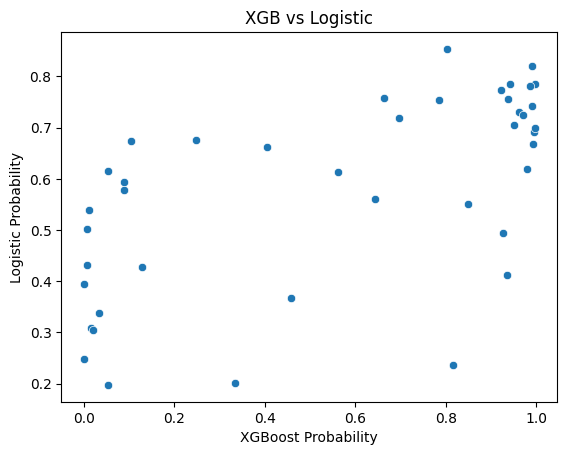

In [ ]:
import seaborn as sns
sns.scatterplot(x=group_stage['xgboost prediction'], y=group_stage['logistic prediction'])
# Add labels and title
plt.xlabel('XGBoost Probability')
plt.ylabel('Logistic Probability')
plt.title('XGB vs Logistic')

# Show the plot
plt.show()